# Rubik's Cubes: An Analysis of Scrambles
Jaraad Kamal

## Background and Definitions
The Rubik's Cube was a puzzle game created by Ernő Rubik in 1974. Throughout the years it has gained immense popularity as more and more people learn to solve it and compete. 
I have been solving Rubik's Cubes for over half my life. I am by no means a competition level solver but I have always been interested in the highest levels of speed cubing.
> **Speed Cubing**
> <br>
> Competitively solving Rubik's Cubes as fast as possible.

In this tutorial we will discuss the scrambles of a **3x3 Rubik's Cube**. 
> **Scramble**
> <br>
> A random set of moves used to get a Rubik's Cube or puzzle into a random unsolved state.
> <br>
> The moves needed to "mix up" a Rubk's Cube.
### Goal
For this tutorial we will be finding out if specific competitions that are harder (produce lower average times than other).


### Notation
Before getting into the data and the code we must first develop an understanding for how notation works in Rubik's Cubes.
<br>
The notation is used as a way to describe which moves are being performed.
<br><br>
There are 4 types of moves for a 3x3 Rubik's Cube:
- Whole cube rotations
- Face Turns
- Wide Moves
- Slice Moves

> **Visual Depictions**
> <br>https://jperm.net/3x3/moves

For the purposes of this tutorial only **Face Turns** will be examined as they are the only types of moves used when scrambling.
<br>
*(note: every type of move can be accomplished with only face turns)*

#### Face Turns
Each Face Turn corresponds to a particular face of the cube.
The basic moves are: 

|Name   | Notation| Variant  |
|----   | --------| ---------|
| Up    | U       | U2 or U' |
| Down  | D       | D2 or D' |
| Left  | L       | L2 or L' |
| Right | R       | R2 or R' |
| Front | F       | F2 or F' |
| Back  | B       | B2 or B' |


Each moves corresponds to one of the 6 faces of the cube.
<br>
They indicate moving a face of the cube clockwise 90 degrees (when viewing the face head on). The addition of `2` means rorate the face 180 degrees (90 degrees twice) and an apostrophe `'` (pronounced *prime*) dictates a counterclockwise rotation.  
> **Example**
><br>
> `U ` means move the top most face 90 degrees **clockwise**
><br>
> `U2` means move the top most face 180 degrees
><br>
> `U'` means move the top most face 90 degrees **counterclockwise**

A typical scramble thus looks like:
<br>
`D U2 F2 D R2 D2 L2 U' R2 B' R2 D F U2 F L2 R' D L`

Now that we understand how notations and scrambles work we can get into the actual data wrangling.

## Getting the Data
For this project I will be using the database created by the **World Cube Association** (WCA), they host the largest and most updated database for competitions throughout the world. I will be using the data up to April 14<sup>th</sup>, 2022.
> **Links**
><br>
> WCA Homepage: https://www.worldcubeassociation.org/
><br>
> WCA Database Download: https://www.worldcubeassociation.org/results/misc/export.html

For this tutorial download the **tsv zip file** and extract the contents into a subfolder of your choice.

## Getting to Know the Data
The files created by the WCA is *big* Trying to just get a text editor to open them up is a bad idea. Before blindly coding it is important that you get comfortable with the way it is formatted. The database comes with a **README** file that gives an overview. 
<br><br>
Briefly, the tsv files are a collection of tables each with their own information. According to the **README** the database itself consists of the following tables:

| Table                                   | Contents                                           |
| --------------------------------------- | -------------------------------------------------- |
| Persons                                 | WCA competitors                                    |
| Competitions                            | WCA competitions                                   |
| Events                                  | WCA events (3x3x3 Cube, Megaminx, etc)             |
| Results                                 | WCA results per competition+event+round+person     |
| RanksSingle                             | Best single result per competitor+event and ranks  |
| RanksAverage                            | Best average result per competitor+event and ranks |
| RoundTypes                              | The round types (first, final, etc)                |
| Formats                                 | The round formats (best of 3, average of 5, etc)   |
| Countries                               | Countries                                          |
| Continents                              | Continents                                         |
| Scrambles                               | Scrambles                                          |
| championships                           | Championship competitions                          |
| eligible_country_iso2s_for_championship | See explanation below                              |


>**Note**
><br>
>For this tutorial we are examining if there are specific scrambles that are harder than others. 
>To do this we will only look at the **Scrambles** and the **Results** tables. 
>The remaining files will not be any use for us.

## The Code
For this tutorial I will be working in **Python 3**.
<br>
First lets import some libraries that will be usefull later on.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Data
The data we need are stored in two files called **WCA_export_Results.tsv** and **WCA_export_Scrambles.tsv**.
To work with this data we will load their information into two variables called `results_frame` and `scrambles_frame`.

In [2]:
results_frame = pd.read_csv("extracted_tsv/WCA_export_Results.tsv", sep = '\t')
scrambles_frame = pd.read_csv("extracted_tsv/WCA_export_Scrambles.tsv", sep = '\t')

Now we can take a small look at the data.

In [3]:
roundTypes = pd.read_csv("extracted_tsv/WCA_export_RoundTypes.tsv", sep = '\t')

In [4]:
display(roundTypes)

,id,rank,name,cellName,final
0,0,19,Qualification round,Qualification round,0
1,1,29,First round,First round,0
2,2,50,Second round,Second round,0
3,3,79,Semi Final,Semi Final,0
4,b,39,B Final,B Final,0
5,c,90,Final,Final,1
6,d,20,First round,First round,0
7,e,59,Second round,Second round,0
8,f,99,Final,Final,1
9,g,70,Third round,Third round,0


In [109]:
display(results_frame.head())
display(scrambles_frame.head())
print("size of results is: ", len(results_frame))
print("size of scrambles is: ", len(scrambles_frame))

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,personCountryId,formatId,value1,value2,value3,value4,value5,regionalSingleRecord,regionalAverageRecord
0,LyonOpen2007,333,1,15,1968,2128,Etienne Amany,2007AMAN01,Cote d_Ivoire,a,1968,2203,2138,2139,2108,AfR,AfR
1,LyonOpen2007,333,1,16,1731,2140,Thomas Rouault,2004ROUA01,France,a,2222,2153,1731,2334,2046,NaN,NaN
2,LyonOpen2007,333,1,17,2305,2637,Antoine Simon-Chautemps,2005SIMO01,France,a,3430,2581,2540,2789,2305,NaN,NaN
3,LyonOpen2007,333,1,18,2452,2637,Irène Mallordy,2007MALL01,France,a,2715,2452,2868,2632,2564,NaN,NaN
4,LyonOpen2007,333,1,19,2677,2906,Marlène Desmaisons,2007DESM01,France,a,2921,3184,2891,2677,2907,NaN,NaN


,scrambleId,competitionId,eventId,roundTypeId,groupId,isExtra,scrambleNum,scramble
0,1,GaleriesDorianOpen2014,pyram,1,A,0,1,U R' L' B U B' R' B' L' U L' u' r' b'
1,2,GaleriesDorianOpen2014,pyram,1,A,0,2,B' L' U' B U' L U' R B' R' L' u r
2,3,GaleriesDorianOpen2014,pyram,1,A,0,3,R' U R' L' B' U L' B' R L' U l'
3,4,GaleriesDorianOpen2014,pyram,1,A,0,4,L R' L U B R L R B R L' u' l
4,5,GaleriesDorianOpen2014,pyram,1,A,0,5,B' U R L' R B L' U' B' R' U' l' r'


size of results is:  2789385
size of scrambles is:  1280056


#### Observations
 - As you can see there is **A LOT** of data, and a lot of the data is information that we do not need.<br>
   **Example**: The tables contain information about events related to *pyramix* and other similar puzzle competitions. This can be seen in the `eventId` column.<br>
   For this tutorial we will be looking at **3x3x3** Rubik's Cube events
- The `competitionId` column stores both the name of the event and the year. This is something that we may need to seperate later on.

#### Determining the Puzzles used
The types of puzzles in the results table.

In [110]:
display(results_frame['eventId'].unique())

array(['333', '333oh', '444', '555', '333bf', '333mbo', 'minx', '333ft',
       'mmagic', 'clock', '333fm', '222', 'magic', 'sq1', 'pyram',
       '444bf', '555bf', '666', '777', '333mbf', 'skewb'], dtype=object)

Types of puzzles in the scrambles table.

In [111]:
display(scrambles_frame['eventId'].unique())

array(['pyram', '333bf', '333', '333oh', '444', '222', '666', 'minx',
       'skewb', '777', '555', '333fm', 'sq1', '333ft', '444bf', 'clock',
       '555bf', '333mbf'], dtype=object)

#### Information on the abbreviations
There are numerous abbreviations for the different events. We are only concerned about the `333` event.
> **All 3x3x3 Events**
> * `333   ` - Standard 3x3x3 event
> * `333bf ` - 3x3x3 Blindfolded
> * `333oh ` - 3x3x3 One Handed
> * `333fm ` - 3x3x3 Fewest Moves
> * `333ft ` - 3x3x3 With Feet
> * `333mbf` - 3x3x3 Multi-Blindfolded

#### Trimming the Data
Now that we know what we are looking for we can remove any rows relating to anything that is not **3x3x3** events

In [112]:
results_frame = results_frame[results_frame['eventId'] == '333']
scrambles_frame = scrambles_frame[scrambles_frame['eventId'] == '333']

We can also remove a lot of the columns from the data. 
<br><br>
**Unnecessary Columns in** `scrambes_frame`**:**
- `eventId` - Everything is now 3x3x3 so we no longer need this
<br><br>
**Unnecessary Columns in** `results_frame`**:**
- `eventId` - Everything is now 3x3x3 so we no longer need this
- `pos` - We do not need to care about the position of the individual competitors
- `best` - We do not need the best time because we are looking for overall trends
- `personCountryId`
- `regionalSingleRecord`
- `regionalAverageRecord`

Now lets drop these columns in the data.

In [113]:
scrambles_frame.drop('eventId', axis = 1, inplace = True)
results_frame.drop(['eventId', 'pos', 'best', 
                    'personCountryId', 'regionalSingleRecord', 
                    'regionalAverageRecord'], axis = 1, inplace = True)

### Preparing for Plotting
Now that we have our data we can plot it to get a visual understanding of how fast Rubki's Cubes have been solved over time. 
This can help visualize any potential patterns. 

#### Separating Out the Date
Previously we noticed that the `competitionId` column contains information about both the competition name and the date. To visualize trends over time we need to separate out the date from this column. All the code below will separate out the dates in both the `results_frame` and the `scramble_frame`.

In [114]:
# Creating temporary tables to hold the new extracted data
extracted_results = results_frame['competitionId'].str.extract("([A-Za-z0-9]*)(\d{4}$)", expand = True)
extracted_scrambles = scrambles_frame['competitionId'].str.extract("([A-Za-z0-9]*)(\d{4}$)", expand = True)
display(extracted_results.head())
display(extracted_scrambles.head())

,0,1
0,LyonOpen,2007
1,LyonOpen,2007
2,LyonOpen,2007
3,LyonOpen,2007
4,LyonOpen,2007


,0,1
31,GaleriesDorianOpen,2014
32,GaleriesDorianOpen,2014
33,GaleriesDorianOpen,2014
34,GaleriesDorianOpen,2014
35,GaleriesDorianOpen,2014


In [115]:
# Inserting columns into results
results_frame.insert(0, 'year', extracted_results[1])
results_frame.insert(1, 'compName', extracted_results[0])
# converting a string to a number
results_frame['year'] = results_frame['year'].astype(int)

# Inserting columns into scrambles
scrambles_frame.insert(1, 'year', extracted_scrambles[1])
scrambles_frame.insert(2, 'compName', extracted_scrambles[0])
# Converting a string to a number
scrambles_frame['year'] = scrambles_frame['year'].astype(int)

# Viewing new tables
display(results_frame.head())
display(scrambles_frame.head())

,year,compName,competitionId,roundTypeId,average,personName,personId,formatId,value1,value2,value3,value4,value5
0,2007,LyonOpen,LyonOpen2007,1,2128,Etienne Amany,2007AMAN01,a,1968,2203,2138,2139,2108
1,2007,LyonOpen,LyonOpen2007,1,2140,Thomas Rouault,2004ROUA01,a,2222,2153,1731,2334,2046
2,2007,LyonOpen,LyonOpen2007,1,2637,Antoine Simon-Chautemps,2005SIMO01,a,3430,2581,2540,2789,2305
3,2007,LyonOpen,LyonOpen2007,1,2637,Irène Mallordy,2007MALL01,a,2715,2452,2868,2632,2564
4,2007,LyonOpen,LyonOpen2007,1,2906,Marlène Desmaisons,2007DESM01,a,2921,3184,2891,2677,2907


,scrambleId,year,compName,competitionId,roundTypeId,groupId,isExtra,scrambleNum,scramble
31,32,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,1,B2 R2 F2 L' U2 R D2 R D' U2 F2 L' R' D L' F L D L
32,33,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,2,R U' D' R2 D' R D B2 L B2 D' F B2 D2 R2 F' D2 ...
33,34,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,3,U R' U F2 R U F B2 U R' U2 F' L2 B2 R2 U2 B U2...
34,35,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,4,B D2 F' R2 D2 B U2 B' L' R' D U' L' B R F' R' ...
35,36,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,5,D2 L2 R F2 D2 F2 R' U2 L B' U F R2 B' D' F2 R ...


One observation is that the data we have on results and the data we have on scrambles may be from different time periods. In the above tables it looks like the results start from 2007 and the scrambles start from 2014. Lets write some code to confirm this suspicion. 

In [116]:
results_years = results_frame['year'].unique().tolist()
scramble_years = scrambles_frame['year'].unique().tolist()
results_years.sort()
scramble_years.sort()
print("We have results over these years:", results_years)
print("We have scrambles over these years:", scramble_years)

We have results over these years: [1982, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
We have scrambles over these years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


The purpose of this analysis is to look at the scrambles so lets drop any data that is before 2014 because that is the earliest we have any scrambles.

In [117]:
results_frame = results_frame[results_frame['year'] >= 2014]

### Determining How the Tables are Related
At this point we have two tables. One for the scrambles and one for individual results. The challenge now is to determine which results correspond to which scrambles.
Because documentation for the data is scarce the best way to develop an understanding is by poking around and viewing the data. 

#### Poking around
Here is some code that will help you view the data and come to some conclusions about how they are related
```python
# Looking at only the scrambles and results from GaleriesDorianOpen2014 event (a small case study)

# getting the scrambles from the event
scrambles_temp = scrambles_frame[scrambles_frame['competitionId'] == 'GaleriesDorianOpen2014']
#getting results
results_temp = results_frame[results_frame['competitionId'] == 'GaleriesDorianOpen2014']

# vewing scrambles and results
display(scrambles_temp)
display(results_temp)

#optional: veiwing the scramble pattern for a particular scramble in the event
print(scrambles_temp.loc[72,'scramble'])
```
The results from the code are omitted for the sake of brevity.

#### Observations and Findings
To find the connection between tables we first need to understand how the competitions are being held.
<br>
In a competition there are multiple rounds (first, second, semi-final, finals, etc.). This round is denoted by the `roundTypeId`. Additionally each round is then further subdivided into *different groups* (lets call them scramble groups) denoted by `gorupId` and each group gets its own specific set of scrambles.
During the competition an individual must solve the Rubik's Cube 5 different times. Each time the Rubik's Cube will get a new but predetermined scramble. In the scrambles table this is denoted by the `scrambleNum`. There are additional extra srambles that went unused in competition. This is denoted by `isExtra`. 
<br><br>
*Note: The extra scrambles (which are discarded values) are most likely stated for the sake of transparency* 
<br><br>
Each scramble, identified by the process above, can then be mapped to an individual player and a time in the results table. A players `roundTypeId` matches as expected. However to match a player to a *sramble group*
> **Example from GaleriesDorianOpen2014:**
> <br>
> A chosen has a `scrambleNum = 1`, `roundTypeId = 1`, `groupID = 'A'`, and a `scramble = "B2 R2 F2 L' U2 R D2 R D' U2 F2 L' R' D L' F L D L"`
> <br><br>
> An individual, Jules Desjardin, has a 
> This indicates that the individual (Jules Desjardin for instance) who was in `roundTypeId` = `1` solved their ***FIRST*** cube in the time corresponding to the value in the column `value1`. In this case it was `1115` centi-seconds.
> <br>
> This solved cube was ***ALWAYS*** scrambled by the moves `B2 R2 F2 L' U2 R D2 R D' U2 F2 L' R' D L' F L D L`

From this we gather that:
- Any scramble denoted as 'extra' may be removed from the dataset
- The `isExtra` and `groupId` columns of the `scrambles_frame` are not necessary for our purposes
- The `formatId` column of the `results frame` is not necessary

In [51]:
# dropping any non extra scrambles
scrambles_frame[scrambles_frame['isExtra'] == 0]
# scrambles_frame = scrambles_frame[scrambles_frame['isExtra'] == 0]

# #dropping unnecessary columns
# scrambles_frame.drop(['isExtra', 'groupId'], axis = 1, inplace = True)
# results_frame.drop('formatId', axis = 1, inplace = True)

#### Making a `get_scramble` Function
Now that we know how the tables are related lets make a function that will get the scramble of a particular cube because this may be something we will do a lot of in the future.

In [85]:
# Looking at only the scrambles and results from GaleriesDorianOpen2014 event (a small case study)

# getting the scrambles from the event
scrambles_temp = scrambles_frame[scrambles_frame['competitionId'] == 'GaleriesDorianOpen2014']
#getting results
results_temp = results_frame[results_frame['competitionId'] == 'GaleriesDorianOpen2014']

# vewing scrambles and results
display(scrambles_temp)
display(results_temp)

#optional: veiwing the scramble pattern for a particular scramble in the event
print(scrambles_temp.loc[72,'scramble'])

    

,scrambleId,year,compName,competitionId,roundTypeId,groupId,isExtra,scrambleNum,scramble
31,32,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,1,B2 R2 F2 L' U2 R D2 R D' U2 F2 L' R' D L' F L D L
32,33,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,2,R U' D' R2 D' R D B2 L B2 D' F B2 D2 R2 F' D2 ...
33,34,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,3,U R' U F2 R U F B2 U R' U2 F' L2 B2 R2 U2 B U2...
34,35,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,4,B D2 F' R2 D2 B U2 B' L' R' D U' L' B R F' R' ...
35,36,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,0,5,D2 L2 R F2 D2 F2 R' U2 L B' U F R2 B' D' F2 R ...
36,37,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,1,1,F2 L' F2 R2 B2 F2 R D2 L' U2 F U2 R D U L D' B...
37,38,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,A,1,2,B2 D' L2 U' R2 B2 D' B2 F2 L' F D L2 F R' D L'...
38,39,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,B,0,1,F2 D2 B U2 R2 D2 R2 U2 F L' F2 D' B' R' D' U R...
39,40,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,B,0,2,R2 B2 D' F2 U' L2 F2 D2 L' B2 R U' B' F2 L F2 ...
40,41,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,B,0,3,F' B' L' F2 L' U2 L B' L' U' B' D2 R B2 R2 L' ...


,year,compName,competitionId,roundTypeId,average,personName,personId,formatId,value1,value2,value3,value4,value5
449810,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1034,Jules Desjardin,2010DESJ01,a,1115,972,811,1016,1993
449811,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1134,Valentin Hoffmann,2011HOFF02,a,1113,1130,1044,1159,1580
449812,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1314,Julien Rochette,2009ROCH01,a,1218,1300,897,-1,1425
449813,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1324,Thomas Pouget,2011POUG01,a,1163,1431,1346,1468,1194
449814,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1412,Mario Laurent,2008LAUR01,a,1488,1544,1343,1369,1380
449815,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1426,Philippe Virouleau,2008VIRO01,a,1355,1396,1528,1616,1318
449816,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1429,Alexandre Richard,2013RICH01,a,1302,1394,1686,1375,1518
449817,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1472,Alban Reynaud,2011REYN02,a,1191,1388,1661,1597,1430
449818,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1524,Pierre Raynal,2008RAYN01,a,1453,1583,1581,1313,1538
449819,2014,GaleriesDorianOpen,GaleriesDorianOpen2014,1,1569,Kevin Guillaumond,2009GUIL01,a,1591,1586,1543,1577,1381


D F2 U2 R2 U F2 U' F2 U' R' D' U2 B U2 R' F2 D' F2 U F


In [118]:
# Looking at only the scrambles and results from GaleriesDorianOpen2014 event (a small case study)

# getting the scrambles from the event
scrambles_temp = scrambles_frame[scrambles_frame['competitionId'] == "BayAreaSpeedcubin29PM2022"]
#getting results
results_temp = results_frame[(results_frame['competitionId'] == "BayAreaSpeedcubin29PM2022")]
results_temp = results_temp[results_temp['roundTypeId'] == '2']

# vewing scrambles and results
display(scrambles_temp)
display(results_temp)

,scrambleId,year,compName,competitionId,roundTypeId,groupId,isExtra,scrambleNum,scramble
1276333,1858511,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,0,1,R U B2 F2 D2 L F2 D2 L2 R U F' R2 F2 D L' U F
1276334,1858512,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,0,2,F' B U2 F' U D2 F' L2 D' B' F2 R2 B2 R D2 R U2...
1276335,1858513,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,0,3,B2 R2 U L2 F2 D F2 D2 L' D L2 U2 B D' R' F2 R ...
1276336,1858514,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,0,4,L2 D' F' R' F2 L F L' R2 B2 D B2 U B2 R2 F2 R ...
1276337,1858515,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,0,5,F R2 U B' D2 F2 B2 L' D L F2 L U2 R F2 D2 L2 D2 U
1276338,1858516,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,1,1,F' R U' F2 U2 L2 F2 U2 F D2 B' U' L' U2 F' L D...
1276339,1858517,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,A,1,2,L' D U2 R2 F R2 B' L2 D2 R2 U2 L' U B2 D L B2 ...
1276340,1858518,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,B,0,1,D F D2 B2 U2 B' L2 R2 D2 R F' R D' L2 F2 L2 D' F'
1276341,1858519,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,B,0,2,L D' F' L B2 R2 U L B2 L' D2 R' U2 D2 F U' F2 U
1276342,1858520,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,1,B,0,3,D2 B' R2 B' F' D2 U2 F D' B L' F R B F L F D2 L'


,year,compName,competitionId,roundTypeId,average,personName,personId,formatId,value1,value2,value3,value4,value5
2788829,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,508,Max Park,2012PARK03,a,488,570,556,453,480
2788830,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,632,Asher Kim-Magierek,2017KIMM01,a,587,597,674,786,624
2788831,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,868,Nicolas Harper,2016HARP02,a,1124,888,781,720,936
2788832,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,873,Mitchell Lane,2010LANE02,a,857,769,845,1139,918
2788833,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,902,Varun Mohanraj,2015MOHA10,a,670,975,1137,786,945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788911,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,2619,Stanley Yap,2022YAPS01,a,2362,2554,2901,2697,2605
2788912,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,2704,Jordan Kim,2022KIMJ03,a,2437,2768,2720,2625,2814
2788913,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,2708,Maxwell Chan,2022CHAN22,a,2172,-1,2794,3040,2290
2788914,2022,BayAreaSpeedcubin29PM,BayAreaSpeedcubin29PM2022,2,2972,Max Schulte,2022SCHU02,a,-1,3109,2339,2794,3013


In [147]:
names = results_temp['personName'].unique().tolist()
names = list(map(lambda x: x.split(' ')[1], names))
# names = list(map(lambda x: x[4:8], names))
names.sort()
print(len(names))
names = [names[0:29],names[29:58], names[58:87]]
for i in range(0, len(names)):
    print(len(names[i]))
    # names[i] = list(map(lambda x: x[4:8], names[1]))
    
names


87
29
29
29


[['Alejandro',
  'Anand',
  'Au-Swartzkopf',
  'Belligundu',
  'Benik',
  'Bharadwaj',
  'Broom',
  'Caspi',
  'Chai',
  'Chan',
  'Chen',
  'Chen',
  'Chen',
  'Chin',
  'David',
  'Elsley',
  'Eluri',
  'Ferrer',
  'Ferrer',
  'Fraga',
  'Gabriel',
  'Ginsberg',
  'Govil',
  'Gu',
  'Gupta',
  'Harper',
  'Hopkins',
  'Huang',
  'Huilgol'],
 ['Jacob',
  'Jansson',
  'Kennedy',
  'Khinvasara',
  'Kim',
  'Kim-Magierek',
  'Lane',
  'Le',
  'Le',
  'Lee',
  'Lin',
  'Luis',
  'Luk',
  'Ma',
  'Mahale',
  'Mangapot',
  'Miller',
  'Mohanraj',
  'Mukundan',
  'Murphree',
  'Nagaraj',
  'Neufeldt',
  'Nosky',
  "O'Leary-Liu",
  'Pang',
  'Park',
  'Pasha',
  'Pasha',
  'Paskow'],
 ['Pastushkov',
  'Poraminthara',
  'Qureshi',
  'Rangan',
  'Ratna',
  'Reddy',
  'Rond',
  'Rose',
  'Schulte',
  'Schumacher',
  'Seitz',
  'Shah',
  'Singh',
  'Son',
  'Starr',
  'Suh',
  'Swaminathan',
  'Swarnapuri',
  'Tam',
  'Tsai',
  'Velmurugan',
  'Vignesh',
  'Wong',
  'Wu',
  'Yao',
  'Yap',
  'Yap

### Plotting Trend Over Time
Now that everything is formatted better we can make a scatter plot to look at the solving time over time.

Text(0.5, 1.0, "Rubik's Cube Solve Speed Over Time")

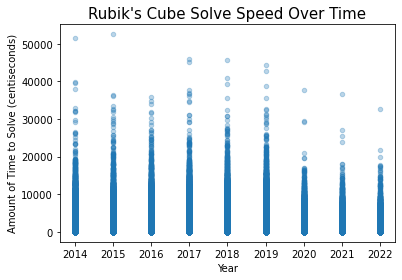

In [26]:
plot = results_frame.plot.scatter('year', 'average', alpha = 0.3)
plot.set(ylabel="Amount of Time to Solve (centiseconds)", xlabel="Year")
plt.rc('axes', titlesize = 15) 
plt.title("Rubik's Cube Solve Speed Over Time")

## Zero Time??
Taking a look at the above plot we can see that there are a lot of averages and solutions that take $0 \space centiseconds$ to solve. This does not make sense, so lets look back at the **README** files to figure out if there is any alternative meaning for a time value of $0$.

> **README Text**
>- The value `-1` means DNF (Did Not Finish).
>- The value `-2` means DNS (Did Not Start).
>- The value `0` means "no result". For example a result in a `best-of-3` round
  has a value of `0` for the `value4`, `value5`, and `average` fields.

The **README** tells us that the above times count for missing points in the dataset. Now lets look at how many points in our dataset are missing.

In [27]:
# looking at the data in the column 'average'

# encoding for the types of missing values
missing_values = {'DNF' : -1, 'DNS': -2, 'No Result': 0}

# to keep track of missing values in the avg column
mis_avg_col = {'DNF' : 0, 'DNS': 0, 'No Result': 0}

for key,value in missing_values.items():
    counts = results_frame['average'].value_counts()
    if value in counts:
        mis_avg_col[key] = counts[value]

# getting totals and percent of total results data
mis_avg_col['Total Missing'] = sum(mis_avg_col.values())
mis_avg_col['Percent of Data'] = 100 * mis_avg_col['Total Missing'] / len(results_frame)

# # to keep track of missing values in columns value1, value2, ...
mis_val_col = {'DNF' : 0, 'DNS': 0, 'No Result': 0}
cols_to_check = ['value1', 'value2', 'value3', 'value4', 'value5']

for col in cols_to_check:
    for key,value in missing_values.items():
        counts = results_frame[col].value_counts()
        if value in counts:
            mis_val_col[key] += counts[value]

# getting totals and percent of total results data
# Note: there are 5 columns combined (5 times the entries) thats why multiply by 20 instead of 100
mis_val_col['Total Missing'] = sum(mis_val_col.values())
mis_val_col['Percent of Data'] = 20 * mis_val_col['Total Missing'] / len(results_frame)

# making table of findings
missing_counts = pd.DataFrame([mis_avg_col,mis_val_col], 
                              index = ['average column', 'values columns'])

display(missing_counts)


,DNF,DNS,No Result,Total Missing,Percent of Data
average column,5677,0,1744,7421,1.134716
values columns,71909,1661,4899,78469,2.399678


There seems to be a lot of missing data. However because of the size of the data set, the missing data reprsents a small portion (only about 2 percent).

## Missing Data

[link to regulations](https://www.worldcubeassociation.org/regulations/guidelines.html#article-9-events)

#### Better Plots
The scatter plot was not really informative. Instead lets create a *violin plot* this is a plot that will allow us to look at the distribution of the data across every year.

In [18]:
# a function that will make the violin plot
# the input x need to be an integer (year)
# the input y is a list of all the values for that year
def vio_plot(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.violinplot(y, x, widths = 4, showmeans = True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

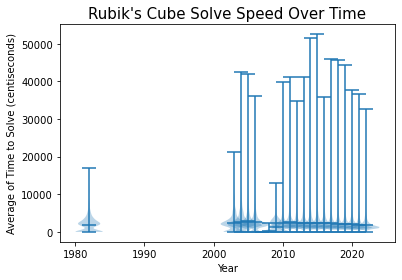

In [19]:
# setting up the data so we can use the violin plot
group_by_year = results_frame.groupby('year').agg({'average':list})
results_list = group_by_year['average'].tolist()
years = results_frame['year'].unique().tolist()

#plotting
vio_plot(years, results_list,
         "Year", "Average of Time to Solve (centiseconds)", "Rubik's Cube Solve Speed Over Time")


Text(0.5, 1.0, "Average Rubik's Cube Solve Speed Over Time")

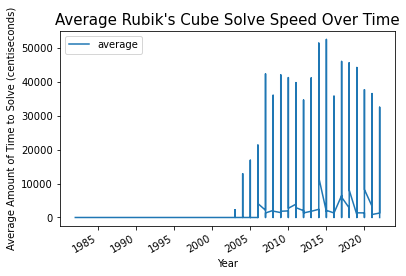

In [14]:
avg_times = results_frame.groupby('year')['average'].mean()
plot = results_frame.plot.line('year', 'average')
plot.set(ylabel="Average Amount of Time to Solve (centiseconds)", xlabel="Year")
plt.rc('axes', titlesize = 15) 
plt.title("Average Rubik's Cube Solve Speed Over Time")

In [15]:
avg_times

year
1982-01-01       0.000000
2003-01-01     132.000000
2004-01-01    1366.628450
2005-01-01    1956.241500
2006-01-01    2256.142710
2007-01-01    2743.282656
2008-01-01    2561.468088
2009-01-01    2871.204328
2010-01-01    2691.151476
2011-01-01    2431.109326
2012-01-01    2323.709859
2013-01-01    2440.848464
2014-01-01    2472.057180
2015-01-01    2381.491144
2016-01-01    2349.112747
2017-01-01    2250.300830
2018-01-01    2215.356430
2019-01-01    2178.279860
2020-01-01    2069.821086
2021-01-01    1856.568272
2022-01-01    1933.390372
Name: average, dtype: float64

In [16]:
results_frame['average'] < 2

0          False
1          False
2          False
3          False
4          False
           ...  
2789216    False
2789217    False
2789218    False
2789219    False
2789220     True
Name: average, Length: 777672, dtype: bool

In [19]:
results_frame

,year,compName,competitionId,roundTypeId,best,average,personName,formatId,value1,value2,value3,value4,value5
0,2007-01-01,LyonOpen,LyonOpen2007,1,1968,2128,Etienne Amany,a,1968,2203,2138,2139,2108
1,2007-01-01,LyonOpen,LyonOpen2007,1,1731,2140,Thomas Rouault,a,2222,2153,1731,2334,2046
2,2007-01-01,LyonOpen,LyonOpen2007,1,2305,2637,Antoine Simon-Chautemps,a,3430,2581,2540,2789,2305
3,2007-01-01,LyonOpen,LyonOpen2007,1,2452,2637,Irène Mallordy,a,2715,2452,2868,2632,2564
4,2007-01-01,LyonOpen,LyonOpen2007,1,2677,2906,Marlène Desmaisons,a,2921,3184,2891,2677,2907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789216,2022-01-01,CubingReturnsRaipur,CubingReturnsRaipur2022,f,1295,1431,Vansh Bansal,a,1404,1508,1459,1295,1430
2789217,2022-01-01,CubingReturnsRaipur,CubingReturnsRaipur2022,f,1283,1481,Yash Tornekar,a,1491,1850,1470,1481,1283
2789218,2022-01-01,CubingReturnsRaipur,CubingReturnsRaipur2022,f,1351,1520,Sarthak Masta,a,1688,1396,1351,1561,1604
2789219,2022-01-01,CubingReturnsRaipur,CubingReturnsRaipur2022,f,1235,1533,Aahan Prajapati,a,1282,1969,1667,1235,1650


In [13]:
avg_times.head()

year
1982-01-01       0.00000
2003-01-01     132.00000
2004-01-01    1366.62845
2005-01-01    1956.24150
2006-01-01    2256.14271
Name: average, dtype: float64